## Classification and the Sigmoid Function


### Introduction to Data Science
#### Last Updated: November 28, 2022
---  

### OBJECTIVES
- Understand why a sigmoid function can be used to model a binary classification problem
- Use functions that apply vectorization
- Apply thresholding to probabilities to return predicted labels
- Understand how the sigmoid function changes when the parameters change

### CONCEPTS
- binary classification
- sigmoid function
- thresholding
- vectorization
- the sigmoid function changes shape in response to parameter changes

---


## Binary Classification

### A. Sigmoid Function

We continue with the binary classification problem: an event can take one of two values:  
- label 1 (positive)
- label 0 (negative)

Note: positive label may not be a "good outcome." It is simply the value of interest.

Examples might be:
- patient recovery
- a shopper purchases a product
- a stock increases in value over a trading day
- a student loves a data science course

We use a model to predict the value. A popular model is the *standard logistic function* or *sigmoid function*. 

The sigmoid function has domain $(-\infty, \infty)$ and range $(0,1)$.

This works well as the range (or output) can be treated as a probability.

Let's define the sigmoid and produce a graph:

In [2]:
import seaborn as sns
import numpy as np

A building block of sigmoid is the exponential function with $e = 2.71828...$ as base.  
The numpy function $exp()$ will compute the exponential of each passed value, returning an array.  
This application of the function on an array of values is called *vectorization*.

Example:

In [5]:
# create a list with two values
xtest = [1, 2]

# compute e raised to power 1, power 2
np.exp(xtest)

array([2.71828183, 7.3890561 ])

Next we define the sigmoid function:

In [6]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

**ASIDE ON FUNCTIONS**  
- Function definitions start with *def*
- The function takes one or more parameters
- The function body must be properly indented
- Outputs are returned with *return* statement

<AxesSubplot:>

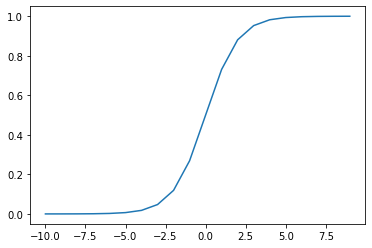

In [13]:
 # build a list of inputs from -10 to 9 incrementing by 1 (right endpoint is excluded)
xs = np.arange(-10, 10)

# call the sigmoid function on each x value
ys=sigmoid(xs)

# plot xs vs ys
sns.lineplot(x=xs, y=ys)

Notice from the graph:

- As $x$ tends to negative infinity, the output (which is a probability) tends to zero.
- As $x$ tends to positive infinity, the output (which is a probability) tends to one.
- For $x$ = 0, the probability is 0.5

If we use sigmoid to represent the probability of a positive label, then as x increases, the probability of a positive label increases to one.

### B. Sigmoid Input

We now have a function that takes an input and outputs the probability of a positive label.  

**But what is the input?**

Recall the mathematical form for linear regression:

$E(Y) = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n$

where 

- $E(Y)$ is the target
- $\beta_0$ is an intercept parameter
- $\beta_1$, ..., $\beta_n$ are slope parameters or *weights*
- $X_1$, ..., $X_n$ are predictors
- $n$ is the number of predictors, which is one in the simplest case

We will use the right hand side of the equation as the input: 

$INPUT = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n$

We feed this into the sigmoid function, and it outputs a probability.

For different parameter values and different predictor values, the probability will be different.

### C. Thresholding

Okay, so we feed input to a sigmoid function, and it outputs the probability of a positive label.

The output will be a number in $(0, 1)$.

**But how do we make a decision?**

We do this by thresholding: 

- set a threshold like 0.5
- compare the probability to the threshold
- if probability > threshold, then predicted label = 1, otherwise predicted label = 0.

In practice, performance metrics such as recall and precision are measured for the threshold.

Using different thresholds will generally give different recall and precision values.

The threshold with optimal metrics can be selected.

---

**TRY FOR YOURSELF**



1) Define a list of integer values from 0 to 20.  Compute the exponential of each of these values, using the `np.exp()` function. This should be done using vectorization, and not a loop.

In [7]:
# answer
lst = np.arange(0, 21)
np.exp(lst)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04,
       1.62754791e+05, 4.42413392e+05, 1.20260428e+06, 3.26901737e+06,
       8.88611052e+06, 2.41549528e+07, 6.56599691e+07, 1.78482301e+08,
       4.85165195e+08])

2) For the resulting array from (1), compare it to 1000. Each element should be True if greater than 1000 and False otherwise.  
Again, this should be done using vectorization.

In [8]:
# answer
np.exp(lst) > 1000

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

3a) Redefine the sigmoid function from above, calling it `sig2`. Rather than taking only `x`, it will take three inputs:

- x1
- b0 (this represents $\beta_0$)
- b1 (this represents $\beta_1$)

The term $np.exp(-x)$ should be replaced with $np.exp(- (b0 + b1 * x1))$

In [45]:
# answer
def sig2(b0, b1, x1):
    return 1 / ( 1 + np.exp(-(b0 + b1 * x1) ))

3b) Use `sig2` with the parameter values below to produce a graph. 

b0 = 0.1  
b1 = 0.5

Let X1 range from -10 to 10, inclusive.  

<AxesSubplot:>

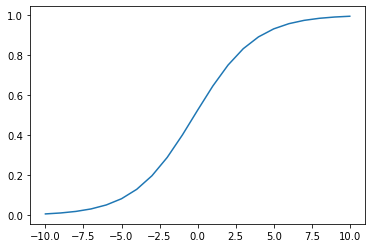

In [46]:
# answer

x1 = np.arange(-10, 11)
b0 = 0.1
b1 = 0.5
ys=sig2(b0, b1, x1)

sns.lineplot(x=x1, y=ys)

3c) What is the value of `sig2` when x1 = 0? Recall the original `sigmoid` outputs probability 0.5 when x=0. Explain why it is different.

In [28]:
# answer
sig2(b0, b1, 0)

0.52497918747894

3d) Use `sig2` with the parameter values below to produce a graph.

b0 = 0.1  
b1 = 20 # this was previously 0.5

Let X1 range from -10 to 10, inclusive.

How is this graph different from the graph in 3b?

<AxesSubplot:>

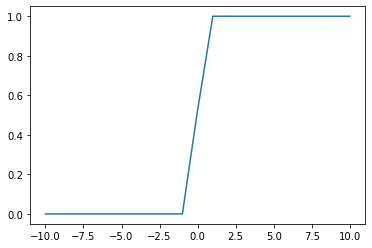

In [48]:
#answer

b0 = 0.1
b1 = 20
ys=sig2(b0, b1, x1)

sns.lineplot(x=x1, y=ys)

# The values more rapidly move to 0 and 1. For example, for x=2.5, the sig2 is 1. This is because b1 is so much larger.

---

### D. Model Fitting

Given a training dataset, the parameters in the sigmoid function can be determined such that the model best fits the data.  
This is the process of training the model.

The training dataset consists of a pair: (predictor values, label) for each observed measurement.  
For example, if $X1 = 2.5$ and $Y=1$, the pair would be (2.5, 1).

To determine "best fit," an objective function is used. The specific fitting process is beyond the scope of this course.

Software such as `sklearn` can do this fitting efficiently.

---